In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [88]:
ipl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Projects/Project 3: IPL Auction 2022/ipl_2022_dataset.csv')

### Reading Dataset

In [89]:
ipl.head(10)

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.00,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.00,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.00,1040.0,KKR,Gujarat Titans
5,5,Mohammad Shami,2 Cr,BOWLER,6.25,812.5,PBKS,Gujarat Titans
6,6,Yash Dayal,20 Lakh,BOWLER,3.20,416.0,NaN,Gujarat Titans
7,7,David Miller,1 Cr,BATTER,3.00,390.0,RR,Gujarat Titans
8,8,R. Sai Kishore,20 Lakh,BOWLER,3.00,390.0,CSK,Gujarat Titans
9,9,Abhinav Sadarangani,20 Lakh,BATTER,2.60,338.0,NaN,Gujarat Titans


### Checking Dataset Info


In [90]:
ipl.shape

(633, 8)

In [91]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [92]:
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

### Dropping Redundant Columns


In [93]:
ipl.drop(columns = ['Unnamed: 0'], inplace=True)

In [94]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


### Checking if any datatype needs to be changed

In [95]:
ipl.dtypes

Player              object
Base Price          object
TYPE                object
COST IN ₹ (CR.)    float64
Cost IN $ (000)    float64
2021 Squad          object
Team                object
dtype: object

### Handling Null values

In [96]:
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [97]:
# Checking the rows in which '2021 Squad' column had null values
ipl[ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [98]:
#Handling Nulll values
ipl['COST IN ₹ (CR.)'] = ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['Cost IN $ (000)'] = ipl['Cost IN $ (000)'].fillna(0)
ipl['2021 Squad'] = ipl['2021 Squad'].fillna('Not Participated')

In [99]:
# No null values are now left in the dataset
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

### Checking duplicate values in dataset

In [100]:
# duplicate rows. Though players name are same, but they are different players
ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold


### How many players participated in 2022 ipl auction?


In [101]:
ipl.shape[0]

633

### How many types of players participated?

In [102]:
types_players = ipl['TYPE'].value_counts()
types_players.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


### Pie chart to show types of players participated

Text(0.5, 1.0, 'Types of Players Participated')

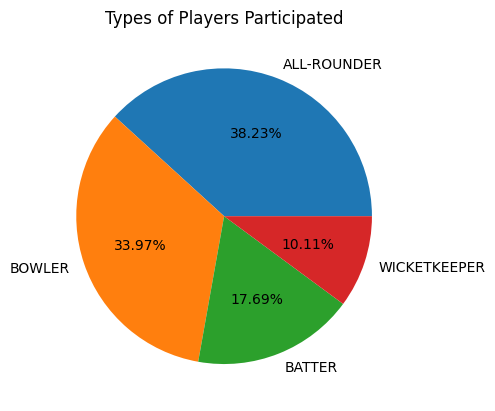

In [103]:
plt.pie(types_players.values,labels=types_players.index, autopct='%1.2f%%' )
plt.title('Types of Players Participated')

#### Creating a new column called 'Status' which depicts whether the player sold or unsold

In [104]:
teams = ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [105]:
ipl['Status'] = ipl['Team'].replace(teams, 'Sold')

In [106]:
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold


### Players sold or unsold in auction

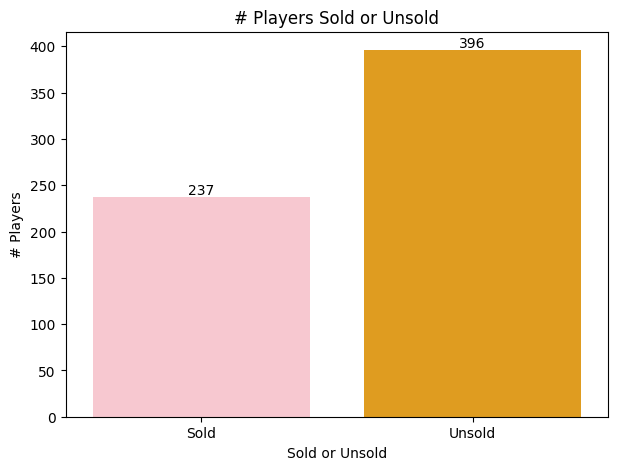

In [107]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x=ipl['Status'],data=ipl['Status'],palette=['Pink', 'Orange'])
plt.xlabel('Sold or Unsold')
plt.ylabel('# Players')
plt.title('# Players Sold or Unsold' )

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'),(p.get_x()+p.get_width()/2.0, p.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')

In [108]:
ipl.groupby(by='Status')['Player'].count()

Status
Sold      237
Unsold    396
Name: Player, dtype: int64

### Total number of players bought by each team

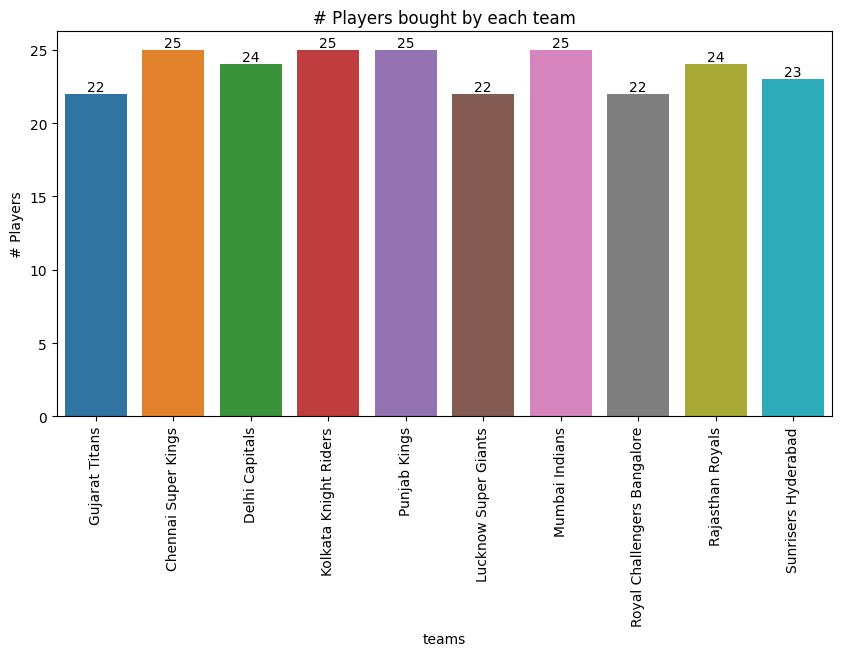

In [109]:
plt.figure(figsize=(10,5))
teams = ipl[ipl['Team'] != 'Unsold']['Team']
ax = sns.countplot(x=teams,data=teams)
plt.xlabel('teams')
plt.xticks(rotation=90)
plt.ylabel('# Players')
plt.title('# Players bought by each team' )

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'),(p.get_x()+p.get_width()/2.0, p.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')

### Creating a new column 'Retention'

In [110]:
ipl['Base Price'].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [111]:
ipl['Retention'] = ipl['Base Price']

In [112]:
ipl['Retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
                          '50 Lakh', '30 Lakh','1.5 Cr'], 'From Auction', inplace = True)

In [113]:
ipl['Base Price'].replace(['Draft Pick','Retained'],0, inplace=True)
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,From Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,From Auction
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick
...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction


### Which team have retained/draft picked how many players

In [114]:
ipl.groupby(by=['Team', 'Retention'])['Retention'].count().iloc[:-1]

Team                         Retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

### Types of Players in each team

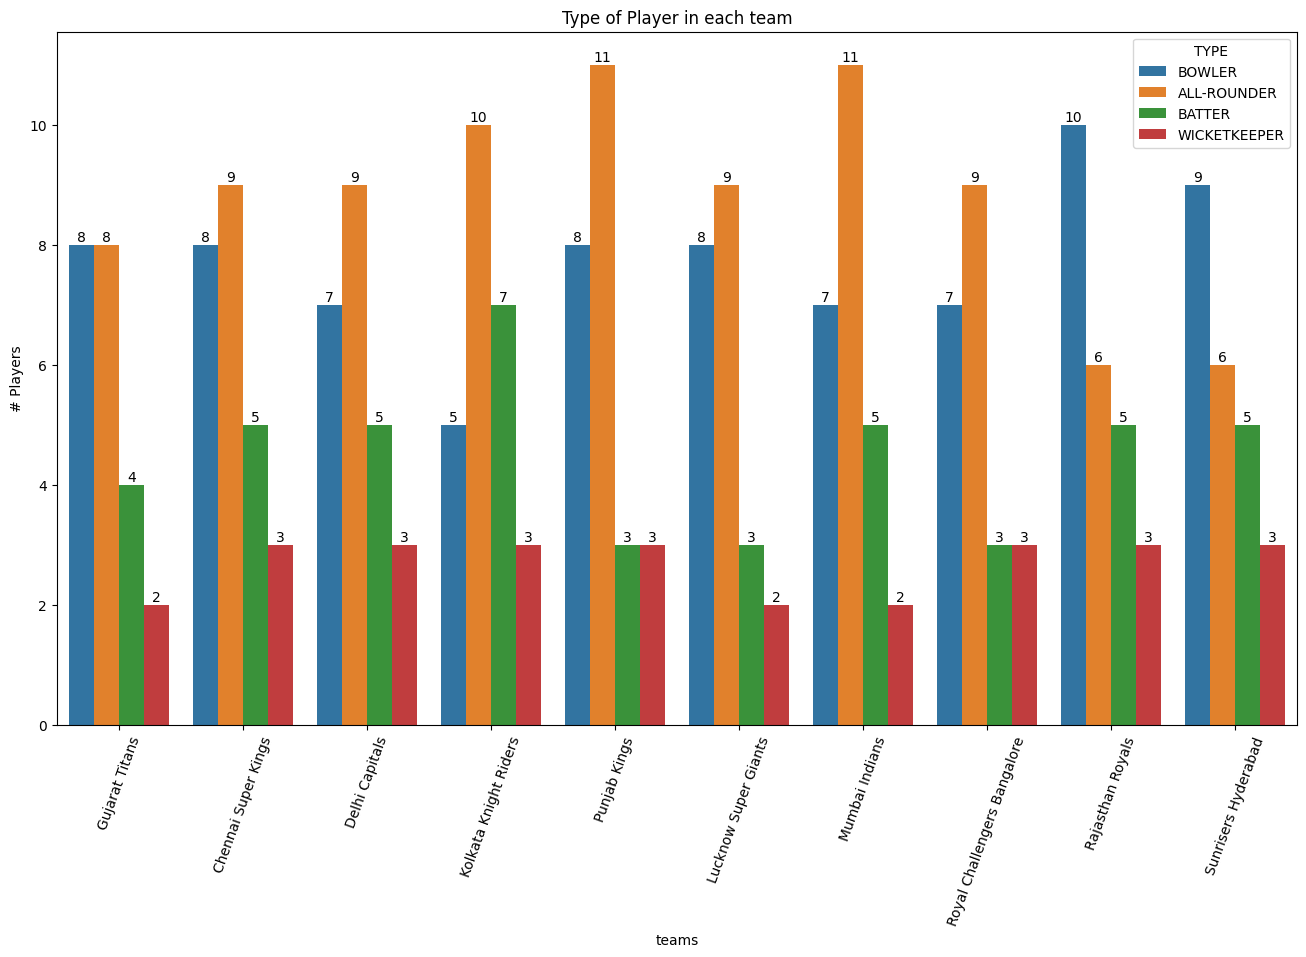

In [115]:
plt.figure(figsize=(16,9))
teams = ipl[ipl['Team'] != 'Unsold']['Team']
ax = sns.countplot(x=teams,data=teams, hue = ipl['TYPE'])
plt.xlabel('teams')
plt.xticks(rotation=70)
plt.ylabel('# Players')
plt.title('Type of Player in each team' )

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'),(p.get_x()+p.get_width()/2.0, p.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')

### Highest amount spent by each team on a player


In [116]:
ipl[ipl['Retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

### Player retained at maximum price

In [117]:
ipl[ipl['Retention']=='Retained'].sort_values(by =['COST IN ₹ (CR.)'], ascending=False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention
22,Ravindra Jadeja,0,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,Sold,Retained


### Top 5 bowlers picked by cost



In [118]:
ipl[(ipl['Retention']=='From Auction') & (ipl['TYPE']=='BOWLER')].sort_values(by =['COST IN ₹ (CR.)'], ascending=False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,Sold,From Auction
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,Sold,From Auction
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,Sold,From Auction
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,Sold,From Auction
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,Sold,From Auction


### Top 5 Blatsman picked by cost

In [119]:
ipl[(ipl['Retention']=='From Auction') & (ipl['TYPE']=='BATTER')].sort_values(by =['COST IN ₹ (CR.)'], ascending=False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention
71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders,Sold,From Auction
193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals,Sold,From Auction
217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad,Sold,From Auction
100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings,Sold,From Auction
195,Devdutt Padikkal,2 Cr,BATTER,7.75,1007.5,RCB,Rajasthan Royals,Sold,From Auction


### Players that played last year but unsold this year

In [121]:
unsold_players = ipl[(ipl['2021 Squad']!='Not Participated')& (ipl['Status']=='Unsold')][['Player','2021 Squad']]
unsold_players.rename(columns={'2021 Squad':'Prev_Team'}, inplace=True)
print(unsold_players)

                      Player Prev_Team
237             Suresh Raina       CSK
238              Steve Smith        DC
239          Shakib Al Hasan       KKR
240              Amit Mishra        DC
241              Adil Rashid      PBKS
242              Imran Tahir       CSK
243            Mujeeb Zadran       SRH
244               Adam Zampa       RCB
245            Rajat Patidar       RCB
246     Mohammed Azharuddeen       RCB
249             M. Siddharth        DC
252              Dawid Malan      PBKS
253              Eoin Morgan       KKR
254        Cheteshwar Pujara       CSK
255           Saurabh Tiwary        MI
257            Ishant Sharma        DC
259            Piyush Chawla        MI
260           Tabraiz Shamsi        RR
262              Sachin Baby       RCB
267              Virat Singh       SRH
269              Akash Singh        RR
273               Chris Lynn        MI
276            George Garton       RCB
288               Andrew Tye        RR
289          Sandeep Warr

In [120]:
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,From Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,From Auction
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick
...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction


### Total money spent by each team

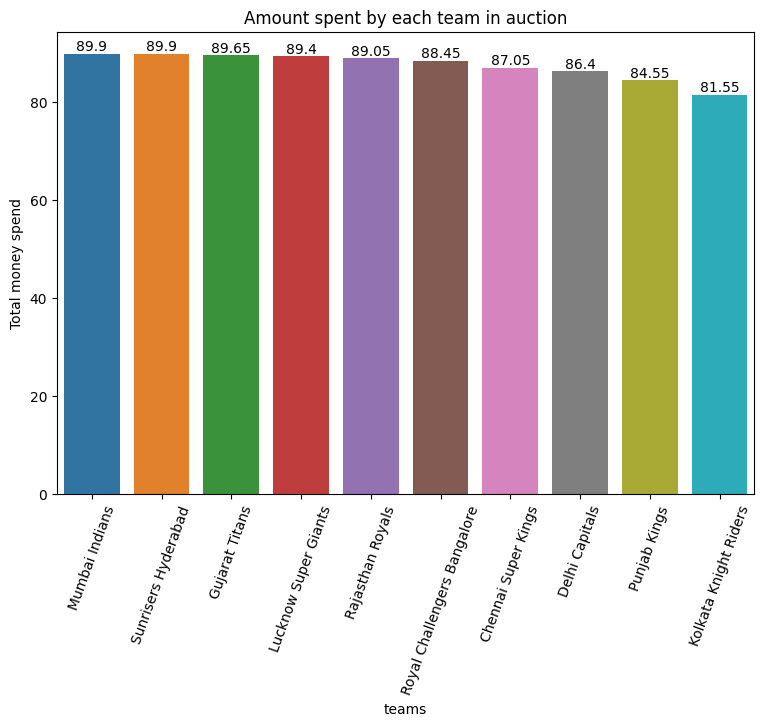

In [146]:
plt.figure(figsize=(9,6))
amount_spent = ipl.groupby('Team')['COST IN ₹ (CR.)'].sum()[:-1].to_frame('Total').sort_values(by = 'Total',ascending=False)
ax=sns.barplot(data =amount_spent, x = amount_spent.index, y='Total')
plt.xlabel('teams')
plt.xticks(rotation=70)
plt.ylabel('Total money spend')
plt.title('Amount spent by each team in auction')

for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2.0, p.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')

In [141]:
ipl.groupby('Team')['COST IN ₹ (CR.)'].sum()[:-1].to_frame().sort_values(by = 'COST IN ₹ (CR.)',ascending=False)


,COST IN ₹ (CR.)
Team,
Mumbai Indians,89.90
Sunrisers Hyderabad,89.90
Gujarat Titans,89.65
Lucknow Super Giants,89.40
Rajasthan Royals,89.05
Royal Challengers Bangalore,88.45
Chennai Super Kings,87.05
Delhi Capitals,86.40
Punjab Kings,84.55
